# Load Data

## Import packages

In [1]:
# import packages
!pip install dataprep
!pip install basemap
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from dataprep.eda import plot
from mpl_toolkits.basemap import Basemap

## Mount drive and set pathnames

In [2]:
# mount drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
"""
In Google Drive, go to "Shared with me", right click Group_34_AT3_240524 file/folder, select "Organize", then "Add shortcut". Add to "My Drive".
You may need to restart your colab runtime.

"""
# define folder path

folder_path = "/content/drive/My Drive/Group_34_AT3_240524/data/"



In [4]:
# looking at data in folder
print(os.listdir(folder_path))

['customers.csv', 'transactions_0.csv', 'transactions_1.csv', 'transactions_2.csv', 'transactions_3.csv', 'transactions_4.csv', 'transactions_5.csv', 'transactions_6.csv', 'transactions_7.csv', 'transactions_13.csv', 'transactions_9.csv', 'transactions_11.csv', 'transactions_10.csv', 'transactions_8.csv', 'transactions_12.csv', 'transactions_15.csv', 'transactions_18.csv', 'transactions_19.csv', 'transactions_17.csv', 'transactions_16.csv', 'transactions_14.csv', 'transactions_21.csv', 'transactions_25.csv', 'transactions_23.csv', 'transactions_20.csv', 'transactions_31.csv', 'transactions_24.csv', 'transactions_27.csv', 'transactions_22.csv', 'transactions_28.csv', 'transactions_26.csv', 'transactions_30.csv', 'transactions_29.csv', 'transactions_32.csv', 'transactions_37.csv', 'transactions_35.csv', 'transactions_36.csv', 'transactions_33.csv', 'transactions_34.csv', 'transactions_38.csv', 'transactions_39.csv', 'transactions_41.csv', 'transactions_43.csv', 'transactions_45.csv', 'tr

## Load transaction data

In [5]:
# extracing list of transaction dataframes

transaction_df_names = [df for df in os.listdir(folder_path) if "transactions" in df]
print(transaction_df_names)

['transactions_0.csv', 'transactions_1.csv', 'transactions_2.csv', 'transactions_3.csv', 'transactions_4.csv', 'transactions_5.csv', 'transactions_6.csv', 'transactions_7.csv', 'transactions_13.csv', 'transactions_9.csv', 'transactions_11.csv', 'transactions_10.csv', 'transactions_8.csv', 'transactions_12.csv', 'transactions_15.csv', 'transactions_18.csv', 'transactions_19.csv', 'transactions_17.csv', 'transactions_16.csv', 'transactions_14.csv', 'transactions_21.csv', 'transactions_25.csv', 'transactions_23.csv', 'transactions_20.csv', 'transactions_31.csv', 'transactions_24.csv', 'transactions_27.csv', 'transactions_22.csv', 'transactions_28.csv', 'transactions_26.csv', 'transactions_30.csv', 'transactions_29.csv', 'transactions_32.csv', 'transactions_37.csv', 'transactions_35.csv', 'transactions_36.csv', 'transactions_33.csv', 'transactions_34.csv', 'transactions_38.csv', 'transactions_39.csv', 'transactions_41.csv', 'transactions_43.csv', 'transactions_45.csv', 'transactions_40.csv

In [6]:
# count number of transaction dataframes

num_transaction_dfs = len(transaction_df_names)
print(num_transaction_dfs)

132


In [7]:
# read all transaction data in folder, store in full dataframe

transaction_df = pd.DataFrame()

for df_name in transaction_df_names:
  df = pd.read_csv(f"{folder_path}{df_name}", engine='python', sep="\|")
  transaction_df = pd.concat([transaction_df, df], ignore_index=True)

In [8]:
# view transaction data

transaction_df

cc_num      acct_num                         trans_num  \
0           4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1           4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2           4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3           4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4           4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                   ...           ...                               ...   
4260899  4413395479406453  929002904576  660c294fe8d540431cc54d25077dc4d1   
4260900  4413395479406453  929002904576  4be02c8434ff59abf1d72f2b8372be0f   
4260901  4413395479406453  929002904576  0b9f714b93b5b1369cdd4fbbc111297d   
4260902  4413395479406453  929002904576  db1d2149e9c939413b0a33b672b496f2   
4260903  4413395479406453  929002904576  fa5d1154d8add5ac13931ab0008df642   

          unix_time       category    amt is_fraud        merchant  merch_lat  \
0        1558719550  gas_transport  69.12        0  Phillips Group  39.491416   
1        1569425519    grocery_pos  68.11        0      Tucker Ltd  40.890319   
2        1577205601       misc_net  40.35        0       Dixon PLC  39.244958   
3        1571428238    grocery_pos  96.22        0  Lambert-Cooper  39.656925   
4        1549840400  gas_transport  71.89        0    Griffith LLC  40.313342   
...             ...            ...    ...      ...             ...        ...   
4260899  1670377413      kids_pets   2.89        0     Morris-Tran  34.687688   
4260900  1664342570           home   9.63        0       Lopez PLC  34.381254   
4260901  1672056151         travel   1.78        0     Sanchez Ltd  33.151970   
4260902  1668741851      kids_pets   8.18        0      Garcia PLC  33.925622   
4260903  1672208268         travel   7.44        0      Lee-Carter  33.684247   

         merch_long  
0        -75.588522  
1        -75.573359  
2        -74.475327  
3        -75.802342  
4        -74.220434  
...             ...  
4260899 -118.891984  
4260900 -117.017665  
4260901 -118.836058  
4260902 -118.417269  
4260903 -118.620519  

[4260904 rows x 10 columns]

In [9]:
# viewing info of transaction data

transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      object 
 1   acct_num    object 
 2   trans_num   object 
 3   unix_time   object 
 4   category    object 
 5   amt         float64
 6   is_fraud    object 
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
dtypes: float64(3), object(7)
memory usage: 325.1+ MB


## Load customer data

In [10]:
# load customer data

customer_df_name = "customers.csv"
customer_df = pd.read_csv(f"{folder_path}{customer_df_name}", engine='python', sep="\|")

In [11]:
# view customer data

customer_df

ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler    PA  19002  40.1809   
1         310 Kendra Common Apt. 164            Leland    NC  28451  34.2680   
2                   05641 Robin Port           Cordova    SC  29039  33.4275   
3             26916 Carlson Mountain        Birmingham    AL  35242  33.3813   
4                    809 Burns Creek             Fargo    GA  31631  30.7166   
..                               ...               ...   ...    ...      ...   
995                1666 Jenna Unions            Denver    CO  80236  39.6535   
996      444 Alexis Estate Suite 824             Wasco    CA  93280  35.6480   
997  914 Cassandra Gateway Suite 061         Escondido    CA  92026  33.1605   
998               34141 Katelyn Path          Mattapan    MA   2126  42.2739   
999        67148 Rose Cliff Apt. 314  Saint Petersburg    FL  33710  27.7898   

         long  city_pop                                    job         dob  \
0    -75.2156     32412                  Accounting technician  1959-10-03   
1    -78.0578     27112                     Professor Emeritus  1963-06-07   
2    -80.8857      4215   International aid/development worker  1973-05-30   
3    -86.7046    493806                    Seismic interpreter  1942-12-26   
4    -82.5801       559  Medical laboratory scientific officer  1939-05-22   
..        ...       ...                                    ...         ...   
995 -105.0376    990452                    Colour technologist  1993-08-31   
996 -119.4487     27152                      Software engineer  1982-05-27   
997 -117.0978    171802                Agricultural consultant  1999-05-14   
998  -71.0939     25562            Civil Service administrator  1994-02-23   
999  -82.7243    341043         Manufacturing systems engineer  1942-07-21   

         acct_num  
0    888022315787  
1    917558277935  
2    718172762479  
3    947268892251  
4    888335239225  
..            ...  
995  201218361926  
996  921460407733  
997  499348764671  
998  617852071065  
999  298026601683  

[1000 rows x 15 columns]

In [12]:
# viewing info of customer data

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


## Checking quality of both datasets

In [13]:
# No data cleaning is necessary as there are no duplicates or missing values

customer_df

ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler    PA  19002  40.1809   
1         310 Kendra Common Apt. 164            Leland    NC  28451  34.2680   
2                   05641 Robin Port           Cordova    SC  29039  33.4275   
3             26916 Carlson Mountain        Birmingham    AL  35242  33.3813   
4                    809 Burns Creek             Fargo    GA  31631  30.7166   
..                               ...               ...   ...    ...      ...   
995                1666 Jenna Unions            Denver    CO  80236  39.6535   
996      444 Alexis Estate Suite 824             Wasco    CA  93280  35.6480   
997  914 Cassandra Gateway Suite 061         Escondido    CA  92026  33.1605   
998               34141 Katelyn Path          Mattapan    MA   2126  42.2739   
999        67148 Rose Cliff Apt. 314  Saint Petersburg    FL  33710  27.7898   

         long  city_pop                                    job         dob  \
0    -75.2156     32412                  Accounting technician  1959-10-03   
1    -78.0578     27112                     Professor Emeritus  1963-06-07   
2    -80.8857      4215   International aid/development worker  1973-05-30   
3    -86.7046    493806                    Seismic interpreter  1942-12-26   
4    -82.5801       559  Medical laboratory scientific officer  1939-05-22   
..        ...       ...                                    ...         ...   
995 -105.0376    990452                    Colour technologist  1993-08-31   
996 -119.4487     27152                      Software engineer  1982-05-27   
997 -117.0978    171802                Agricultural consultant  1999-05-14   
998  -71.0939     25562            Civil Service administrator  1994-02-23   
999  -82.7243    341043         Manufacturing systems engineer  1942-07-21   

         acct_num  
0    888022315787  
1    917558277935  
2    718172762479  
3    947268892251  
4    888335239225  
..            ...  
995  201218361926  
996  921460407733  
997  499348764671  
998  617852071065  
999  298026601683  

[1000 rows x 15 columns]

#Data Split

In [14]:
# Split data into 80-10-10 train-validation-test splits, only need to split the transaction df as the customer information will be joined
transaction_train_df, transaction_test_df = train_test_split(transaction_df, test_size=0.2, random_state=42)
transaction_validation_df, transaction_test_df = train_test_split(transaction_test_df, test_size=0.5, random_state=42)

print("Training Set Size:", transaction_train_df.shape[0], "rows")
print("Validation Set Size:", transaction_validation_df.shape[0], "rows")
print("Test Set Size:", transaction_test_df.shape[0], "rows")


Training Set Size: 3408723 rows
Validation Set Size: 426090 rows
Test Set Size: 426091 rows


In [15]:
# Merge into single dataframe through 'cc_num' column
df_merged = pd.merge(transaction_train_df, customer_df, on='cc_num', how='left')

# Delete and rename duplicate column
df_merged = df_merged.drop(columns=['acct_num_y'])
df_merged = df_merged.rename(columns={'acct_num_x': 'acct_num'})

# Cast dates to datetime in order to add new 'age_at_transaction' variable
df_merged['transaction_date'] = pd.to_datetime(df_merged['unix_time'], unit='s')
df_merged['dob'] = pd.to_datetime(df_merged['dob'])
df_merged['age_at_transaction'] = (df_merged['transaction_date'] - df_merged['dob']).dt.days // 365

# Convert the datetime objects to Unix timestamp (seconds since epoch)
df_merged['dob'] = df_merged['dob'].astype('int64') // 1e9  # Convert

# Cast 'is_fraud' column as an integer to plot correlation
df_merged['is_fraud'] = df_merged['is_fraud'].astype(int)

# Show new merged df
df_merged


cc_num      acct_num                         trans_num  \
0        3524295633432445  625080730349  9396ea213130349f5b1492cf487563ae   
1        6011254920369300  283750594603  525ab5f07b0b7dd53c4edf9e99c7cd44   
2        3505673030644213  991686287359  639e38c6f21914876c0665190ac32893   
3        4436877156922095  135148109008  1d2f28781c18c756373f582e125d8ec1   
4        4005214107071635  410294301577  38708ebee1eb66f0d5175365551fe840   
...                   ...           ...                               ...   
3408718  4678112669121531  536817324563  5ac193d46bf0db0e289369b94b945521   
3408719  3582661287585755  679151474133  f3c4f7c1f359a91fc34a3ac5830c364f   
3408720  3585991449207494  701729361186  f3ae4e0d91a5fa681b383f48474a1aba   
3408721  3506323654018141  810324211184  f0e5ab804fa20cb02e9d3cea6f48d1e7   
3408722    38662705115791  311512417720  a6c5878c2c46cf016ee995bf1b4eaa70   

          unix_time       category     amt  is_fraud                merchant  \
0        1582487131       misc_pos    6.41         0            Davis-Parker   
1        1655017577      kids_pets   72.40         0        Schneider-Miller   
2        1647381962    grocery_pos  105.25         0     Washington-Morrison   
3        1598417613   shopping_net   19.52         0        Gutierrez-Monroe   
4        1624624487    food_dining    7.69         0               Clark LLC   
...             ...            ...     ...       ...                     ...   
3408718  1579640229       misc_pos    2.28         0           Torres-Waters   
3408719  1667281682  personal_care  249.31         0          Bennett-Flores   
3408720  1661338619  personal_care   79.87         0       Thompson-Mitchell   
3408721  1607814238  entertainment   84.99         0  Summers, Ross and Holt   
3408722  1589600448       misc_pos   39.59         0           Reilly-Willis   

         merch_lat  merch_long  ...          city state    zip      lat  \
0        40.119437  -88.333969  ...       Tuscola    IL  61953  39.7995   
1        38.371720 -120.454089  ...  Gardnerville    NV  89410  38.8703   
2        39.824725  -86.121050  ...     Lafayette    IN  47909  40.3228   
3        38.090513  -88.340286  ...   Norris City    IL  62869  37.9773   
4        34.679006 -117.997972  ...   Los Angeles    CA  90022  34.0245   
...            ...         ...  ...           ...   ...    ...      ...   
3408718  34.774994 -118.585926  ...   Bakersfield    CA  93311  35.3039   
3408719  22.650680 -160.235242  ...         Lihue    HI  96766  21.9816   
3408720  34.307419 -117.625697  ...     Lancaster    CA  93536  34.7471   
3408721  46.551929  -89.866694  ...     Ontonagon    MI  49953  46.8275   
3408722  33.782142 -111.467234  ...    Scottsdale    AZ  85258  33.5647   

             long city_pop                              job          dob  \
0        -88.2816     6216              Designer, furniture -583459200.0   
1       -119.6115    23793           Occupational hygienist -305078400.0   
2        -86.8881    98078          Chief Executive Officer -970099200.0   
3        -88.3243     2682        Psychologist, educational  791942400.0   
4       -118.1561  2383912            Accounting technician  159235200.0   
...           ...      ...                              ...          ...   
3408718 -119.1056   520197                  Ophthalmologist -110505600.0   
3408719 -159.3683    14683                          Midwife    7603200.0   
3408720 -118.3687   182305                     TEFL teacher  587174400.0   
3408721  -89.3485     2879  Commercial/residential surveyor -498700800.0   
3408722 -111.8931   268597     Conservation officer, nature  116380800.0   

           transaction_date  age_at_transaction  
0       2020-02-23 19:45:31                  68  
1       2022-06-12 07:06:17                  62  
2       2022-03-15 22:06:02                  82  
3       2020-08-26 04:53:33                  25  
4       2021-06-25 12:34:47                  46  
...                

## Prepare Data

In [16]:
# Repeat merge for validation and test sets

df_merged_val = pd.merge(transaction_validation_df, customer_df, on='cc_num', how='left')
df_merged_test = pd.merge(transaction_test_df, customer_df, on='cc_num', how='left')


df_merged_val = df_merged_val.drop(columns=['acct_num_y'])
df_merged_val = df_merged_val.rename(columns={'acct_num_x': 'acct_num'})

df_merged_test = df_merged_test.drop(columns=['acct_num_y'])
df_merged_test = df_merged_test.rename(columns={'acct_num_x': 'acct_num'})


df_merged_val['transaction_date'] = pd.to_datetime(df_merged_val['unix_time'], unit='s')
df_merged_val['dob'] = pd.to_datetime(df_merged_val['dob'])
df_merged_val['age_at_transaction'] = (df_merged_val['transaction_date'] - df_merged_val['dob']).dt.days // 365

df_merged_test['transaction_date'] = pd.to_datetime(df_merged_test['unix_time'], unit='s')
df_merged_test['dob'] = pd.to_datetime(df_merged_test['dob'])
df_merged_test['age_at_transaction'] = (df_merged_test['transaction_date'] - df_merged_test['dob']).dt.days // 365


df_merged_val['dob'] = df_merged_val['dob'].astype('int64') // 1e9
df_merged_test['dob'] = df_merged_test['dob'].astype('int64') // 1e9


df_merged_val['is_fraud'] = df_merged_val['is_fraud'].astype(int)

df_merged_test['is_fraud'] = df_merged_test['is_fraud'].astype(int)



In [17]:
#Setting the "is_fraud" column as the target variable
target = 'is_fraud'


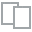
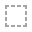
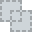
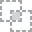
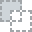
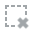
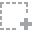
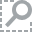
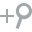
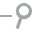
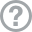
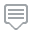
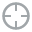
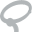
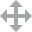
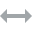
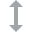
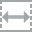
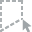
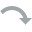
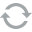
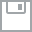
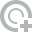
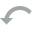
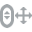
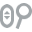
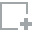
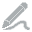
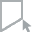
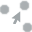
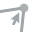
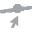

In [18]:
#statistics of target variable
plot(df_merged_val,target)

In [19]:
#Finding the numerical variables with strongest correlation to the target variable
correlation_matrix = df_merged_val.corr()

fraud_corr = correlation_matrix[target]
sorted_corr = fraud_corr.abs().sort_values(ascending=False)
sorted_corr = sorted_corr.drop(target)
sorted_vars = sorted_corr.index.tolist()

print(sorted_corr)

amt                   0.095730
age_at_transaction    0.004862
dob                   0.004374
long                  0.002053
merch_long            0.002026
zip                   0.000973
city_pop              0.000805
lat                   0.000022
merch_lat             0.000003
Name: is_fraud, dtype: float64


In [20]:
#Creating copy of df to perform data preparation
df_cleaned = df_merged.copy()
df_cleaned_val = df_merged_val.copy()
df_cleaned_test = df_merged_test.copy()

In [21]:
#Removing unnecessary columns reucing redundancy and noise as well as identifiers
df_cleaned = df_cleaned.drop(['cc_num','acct_num','trans_num','unix_time','ssn','transaction_date','merch_lat','merch_long','first','last','street','city','zip','lat','long','dob'], axis=1)
df_cleaned_val = df_cleaned_val.drop(['cc_num','acct_num','trans_num','unix_time','ssn','transaction_date','merch_lat','merch_long','first','last','street','city','zip','lat','long','dob'], axis=1)
df_cleaned_test = df_cleaned_test.drop(['cc_num','acct_num','trans_num','unix_time','ssn','transaction_date','merch_lat','merch_long','first','last','street','city','zip','lat','long','dob'], axis=1)

df_cleaned

category     amt  is_fraud                merchant gender state  \
0             misc_pos    6.41         0            Davis-Parker      M    IL   
1            kids_pets   72.40         0        Schneider-Miller      M    NV   
2          grocery_pos  105.25         0     Washington-Morrison      F    IN   
3         shopping_net   19.52         0        Gutierrez-Monroe      F    IL   
4          food_dining    7.69         0               Clark LLC      M    CA   
...                ...     ...       ...                     ...    ...   ...   
3408718       misc_pos    2.28         0           Torres-Waters      F    CA   
3408719  personal_care  249.31         0          Bennett-Flores      M    HI   
3408720  personal_care   79.87         0       Thompson-Mitchell      F    CA   
3408721  entertainment   84.99         0  Summers, Ross and Holt      M    MI   
3408722       misc_pos   39.59         0           Reilly-Willis      M    AZ   

         city_pop                              job  age_at_transaction  
0            6216              Designer, furniture                  68  
1           23793           Occupational hygienist                  62  
2           98078          Chief Executive Officer                  82  
3            2682        Psychologist, educational                  25  
4         2383912            Accounting technician                  46  
...           ...                              ...                 ...  
3408718    520197                  Ophthalmologist                  53  
3408719     14683                          Midwife                  52  
3408720    182305                     TEFL teacher                  34  
3408721      2879  Commercial/residential surveyor                  66  
3408722    268597     Conservation officer, nature                  46  

[3408723 rows x 9 columns]

In [22]:
#Splitting dataset between features and target
X_train = df_cleaned.drop(target, axis=1)
y_train = df_cleaned[target]

X_val = df_cleaned_val.drop(target, axis=1)
y_val = df_cleaned_val[target]

X_test = df_cleaned_test.drop(target, axis=1)
y_test = df_cleaned_test[target]

In [23]:
#Show info on train set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3408723 entries, 0 to 3408722
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   category            object 
 1   amt                 float64
 2   merchant            object 
 3   gender              object 
 4   state               object 
 5   city_pop            int64  
 6   job                 object 
 7   age_at_transaction  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 234.1+ MB


In [24]:
#Encoding categorical features for use in SMOTE and Random Forrest
categorical_columns = ['category', 'merchant', 'gender', 'state', 'job']

label_encoder = LabelEncoder()

for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

for column in categorical_columns:
    X_val[column] = label_encoder.fit_transform(X_val[column])

for column in categorical_columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])

# Apply SMOTE and check
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original Training Set Size:", X_train.shape[0], "rows")
print("Resampled Training Set Size:", X_train_resampled.shape[0], "rows")


Original Training Set Size: 3408723 rows
Resampled Training Set Size: 6809410 rows


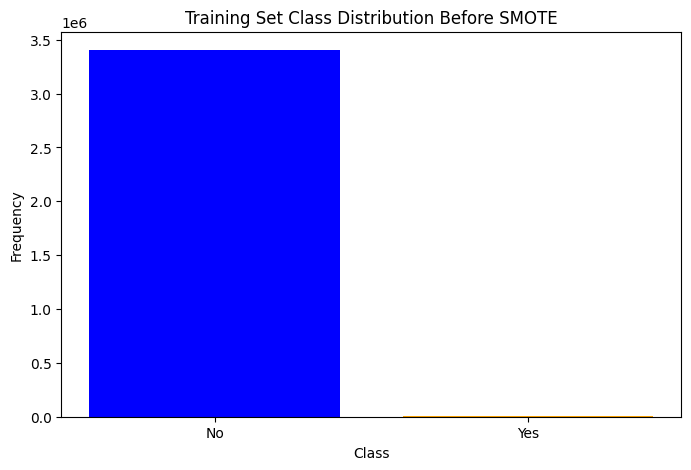

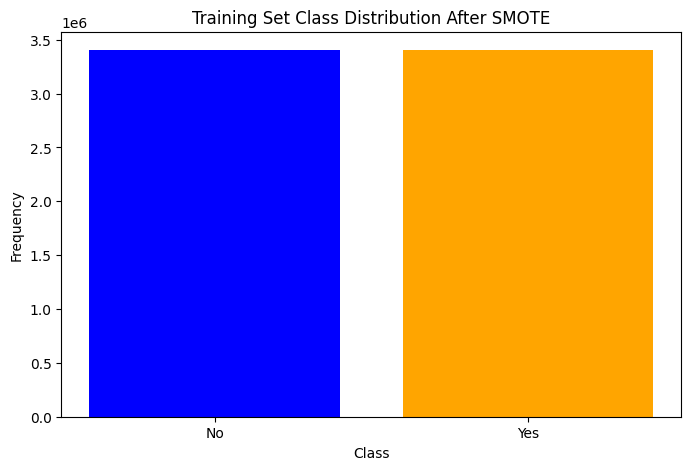

In [25]:
# Plotting the class distribution before and after SMOTE
class_counts_smote = y_train.value_counts()
class_counts_smote_resampled = y_train_resampled.value_counts()

plt.figure(figsize=(8, 5))
plt.bar(class_counts_smote.index, class_counts_smote.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Training Set Class Distribution Before SMOTE')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(class_counts_smote_resampled.index, class_counts_smote_resampled.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Training Set Class Distribution After SMOTE')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [26]:
# Create and evaluate a baseline model
most_common_class = y_train.mode()[0]

baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

y_val_pred = baseline_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Set Accuracy: {val_accuracy:.2f}")
print("Validation Set Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Set Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    425598
           1       0.00      0.00      0.00       492

    accuracy                           1.00    426090
   macro avg       0.50      0.50      0.50    426090
weighted avg       1.00      1.00      1.00    426090



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Hyperparameter Tuning

In [27]:
# Create a smaller sample of the train set in order to tune hyperparameters without the need of additional compute power
X_train_sample, X_hyperparam, y_train_sample, y_hyperparam = train_test_split(X_train_resampled, y_train_resampled, test_size=0.1, random_state=42)

print("Original Training Set Size:", X_train.shape[0], "rows")
print("Hyperparameter Tuning Sample Size:", X_hyperparam.shape[0], "rows")
print("Reduced Training Set Size:", X_train_sample.shape[0], "rows")


Original Training Set Size: 3408723 rows
Hyperparameter Tuning Sample Size: 680941 rows
Reduced Training Set Size: 6128469 rows


In [ ]:
# Use Randomized Search for hyperparameter tuning of Random Forrest Classifier
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_hyperparam, y_hyperparam)

print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


##Modeling & Evaluation

In [ ]:
# Train and evaluate Random Forrest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

In [ ]:
#Plot Confusion Matrix of the Random Forrest classifier
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
